In [5]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import palettable as pltt

from pathlib import Path

In [6]:
DATA = Path('data')

In [7]:
!ls {DATA}

bangalore  bmtc  clients.xlsx  maps


In [9]:
wards = gpd.read_file(DATA/'bangalore'/'bangalore'/'GIS'/'bbmpwards'/'bbmpwards.shp')

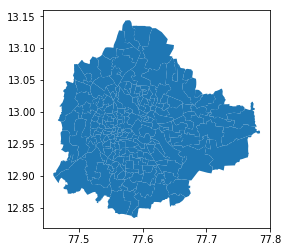

In [13]:
wards.plot()

In [14]:
wards.shape

(198, 15)

In [15]:
wards.head(2).T

0  \
OBJECTID                                                    1   
ASS_CONST_                                                150   
ASS_CONST1                                          Yelahanka   
WARD_NO                                                     2   
WARD_NAME                                    Chowdeswari Ward   
POP_M                                                   10402   
POP_F                                                    9224   
POP_SC                                                   2630   
POP_ST                                                    286   
POP_TOTAL                                               19626   
AREA_SQ_KM                                               7.06   
LAT                                                   13.1217   
LON                                                   77.5804   
RESERVATIO                                            General   
geometry    POLYGON ((77.59229387222348 13.09719619380583,...   

                                                            1  
OBJECTID                                                    2  
ASS_CONST_                                                150  
ASS_CONST1                                          Yelahanka  
WARD_NO                                                     3  
WARD_NAME                                              Atturu  
POP_M                                                   13129  
POP_F                                                   10891  
POP_SC                                                   2921  
POP_ST                                                    665  
POP_TOTAL                                               24020  
AREA_SQ_KM                                              10.15  
LAT                                                   13.1028  
LON                                                     77.56  
RESERVATIO                                    General (Women)  
geometry    POLYGON ((77.56862025574898 13.12704949189955,...

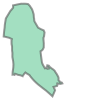

In [16]:
wards.iloc[0].geometry

In [20]:
routes = gpd.read_file(DATA/'bmtc'/'data'/'routes.2018.json')
busstops = gpd.read_file(DATA/'bmtc'/'data'/'busstops.geojson')

In [21]:
routes.shape

(2045, 12)

In [22]:
busstops.shape

(2201, 5)

In [23]:
routes.head(2).T

0  \
origin                                        Jayanagara 9th Block   
distance                                                      19.6   
last_departure                                            17:45:00   
first_arrival                                             08:50:00   
route                                                            1   
destination                    Yeshwanathapura new railway station   
first_departure                                           07:35:00   
last_arrival                                              19:00:00   
duration                                                      1.25   
speed                                                        15.68   
trips                                                           23   
geometry         LINESTRING (77.59235889944161 12.9197565816171...   

                                                                 1  
origin                                          JPNagara 6th Phase  
distance                                                      20.8  
last_departure                                            21:00:00  
first_arrival                                             08:45:00  
route                                                           1E  
destination                         Chowdeshwari Bus Stand JP Park  
first_departure                                           07:20:00  
last_arrival                                              22:25:00  
duration                                                   1.41667  
speed                                                      14.6824  
trips                                                            8  
geometry         LINESTRING (77.5776125399524 12.9064924294071,...

In [24]:
bustops.head(2)

name        lat        lon  \
0  Jayanagara 9th Block,JAYANAGARA 9TH BLOCK,BESI...  12.919757  77.592359   
1  Jayanagara T Block,JAYANAGARA 4TH T BLOCK,BESI...  12.922689  77.593385   

   value                   geometry  
0   0.45  POINT (77.59236 12.91976)  
1   0.45  POINT (77.59338 12.92269)

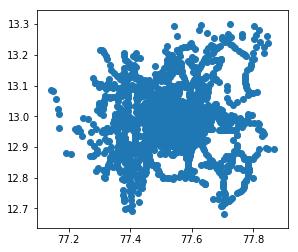

In [25]:
busstops.plot()

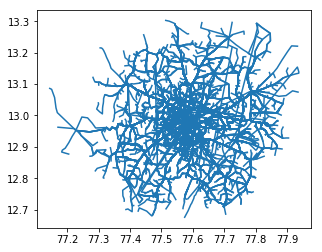

In [26]:
routes.plot()

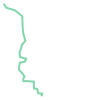

In [28]:
routes.iloc[0].geometry

In [43]:
wards.crs, busstops.crs, routes.crs

({'init': 'epsg:4326'}, {'init': 'epsg:4326'}, {'init': 'epsg:4326'})

In [68]:
# Pseudo Mercator Projection
wards = wards.to_crs(epsg=3857)
busstops = busstops.to_crs(epsg=3857)
routes = routes.to_crs(epsg=3857)

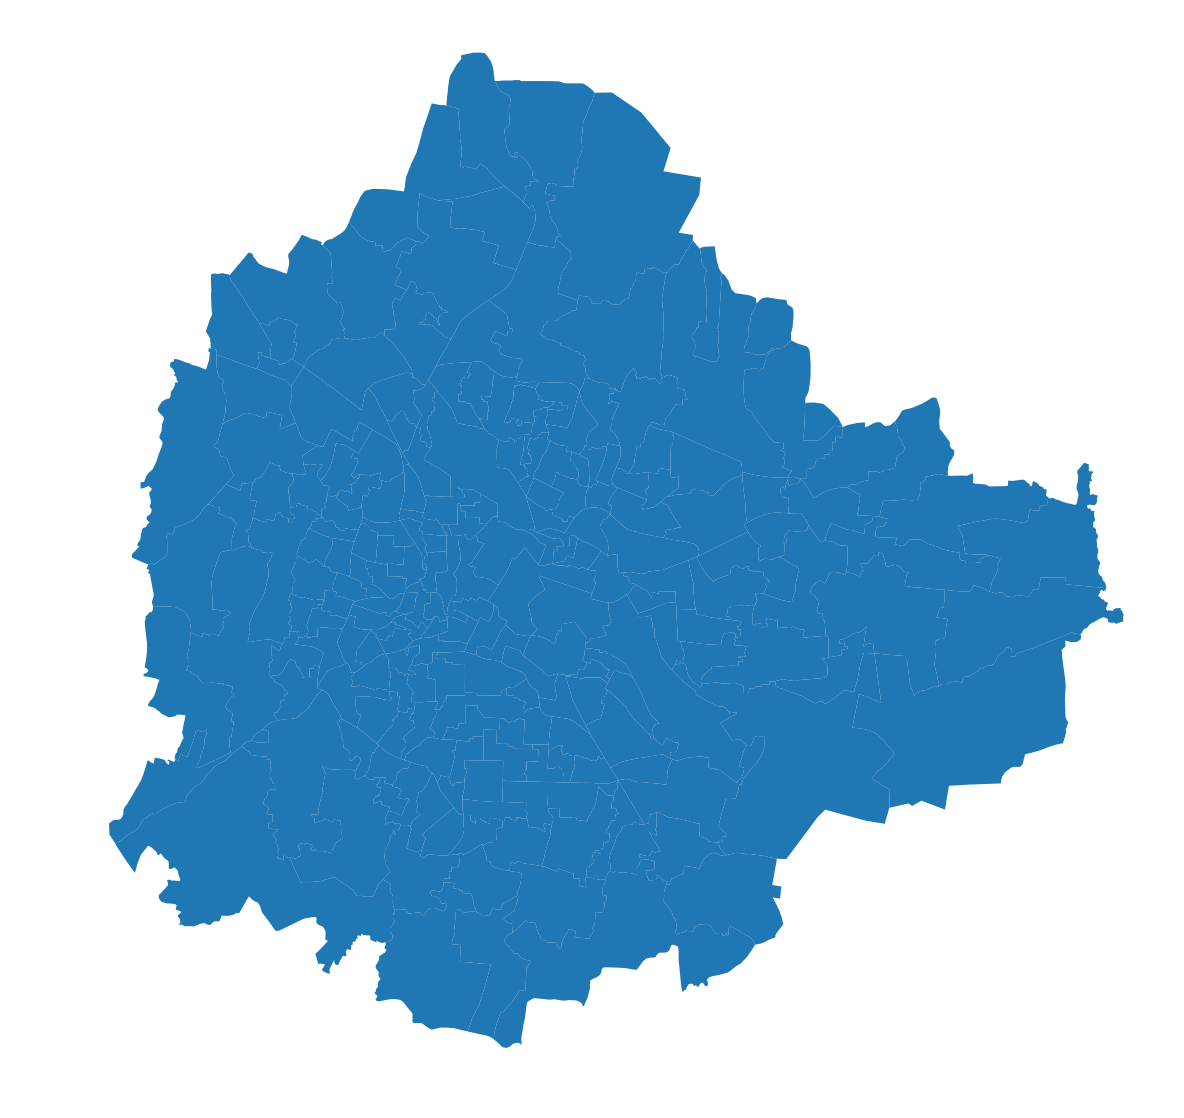

In [69]:
f,ax = plt.subplots(1, figsize=(20,20))
wards.plot(ax=ax, )
ax.set_axis_off()
plt.axis('equal')
plt.show()

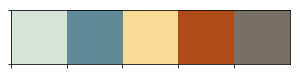

In [53]:
wes = pltt.wesanderson.Darjeeling2_5.hex_colors
sns.palplot(wes)

In [54]:
wes

['#D5E3D8', '#618A98', '#F9DA95', '#AE4B16', '#787064']

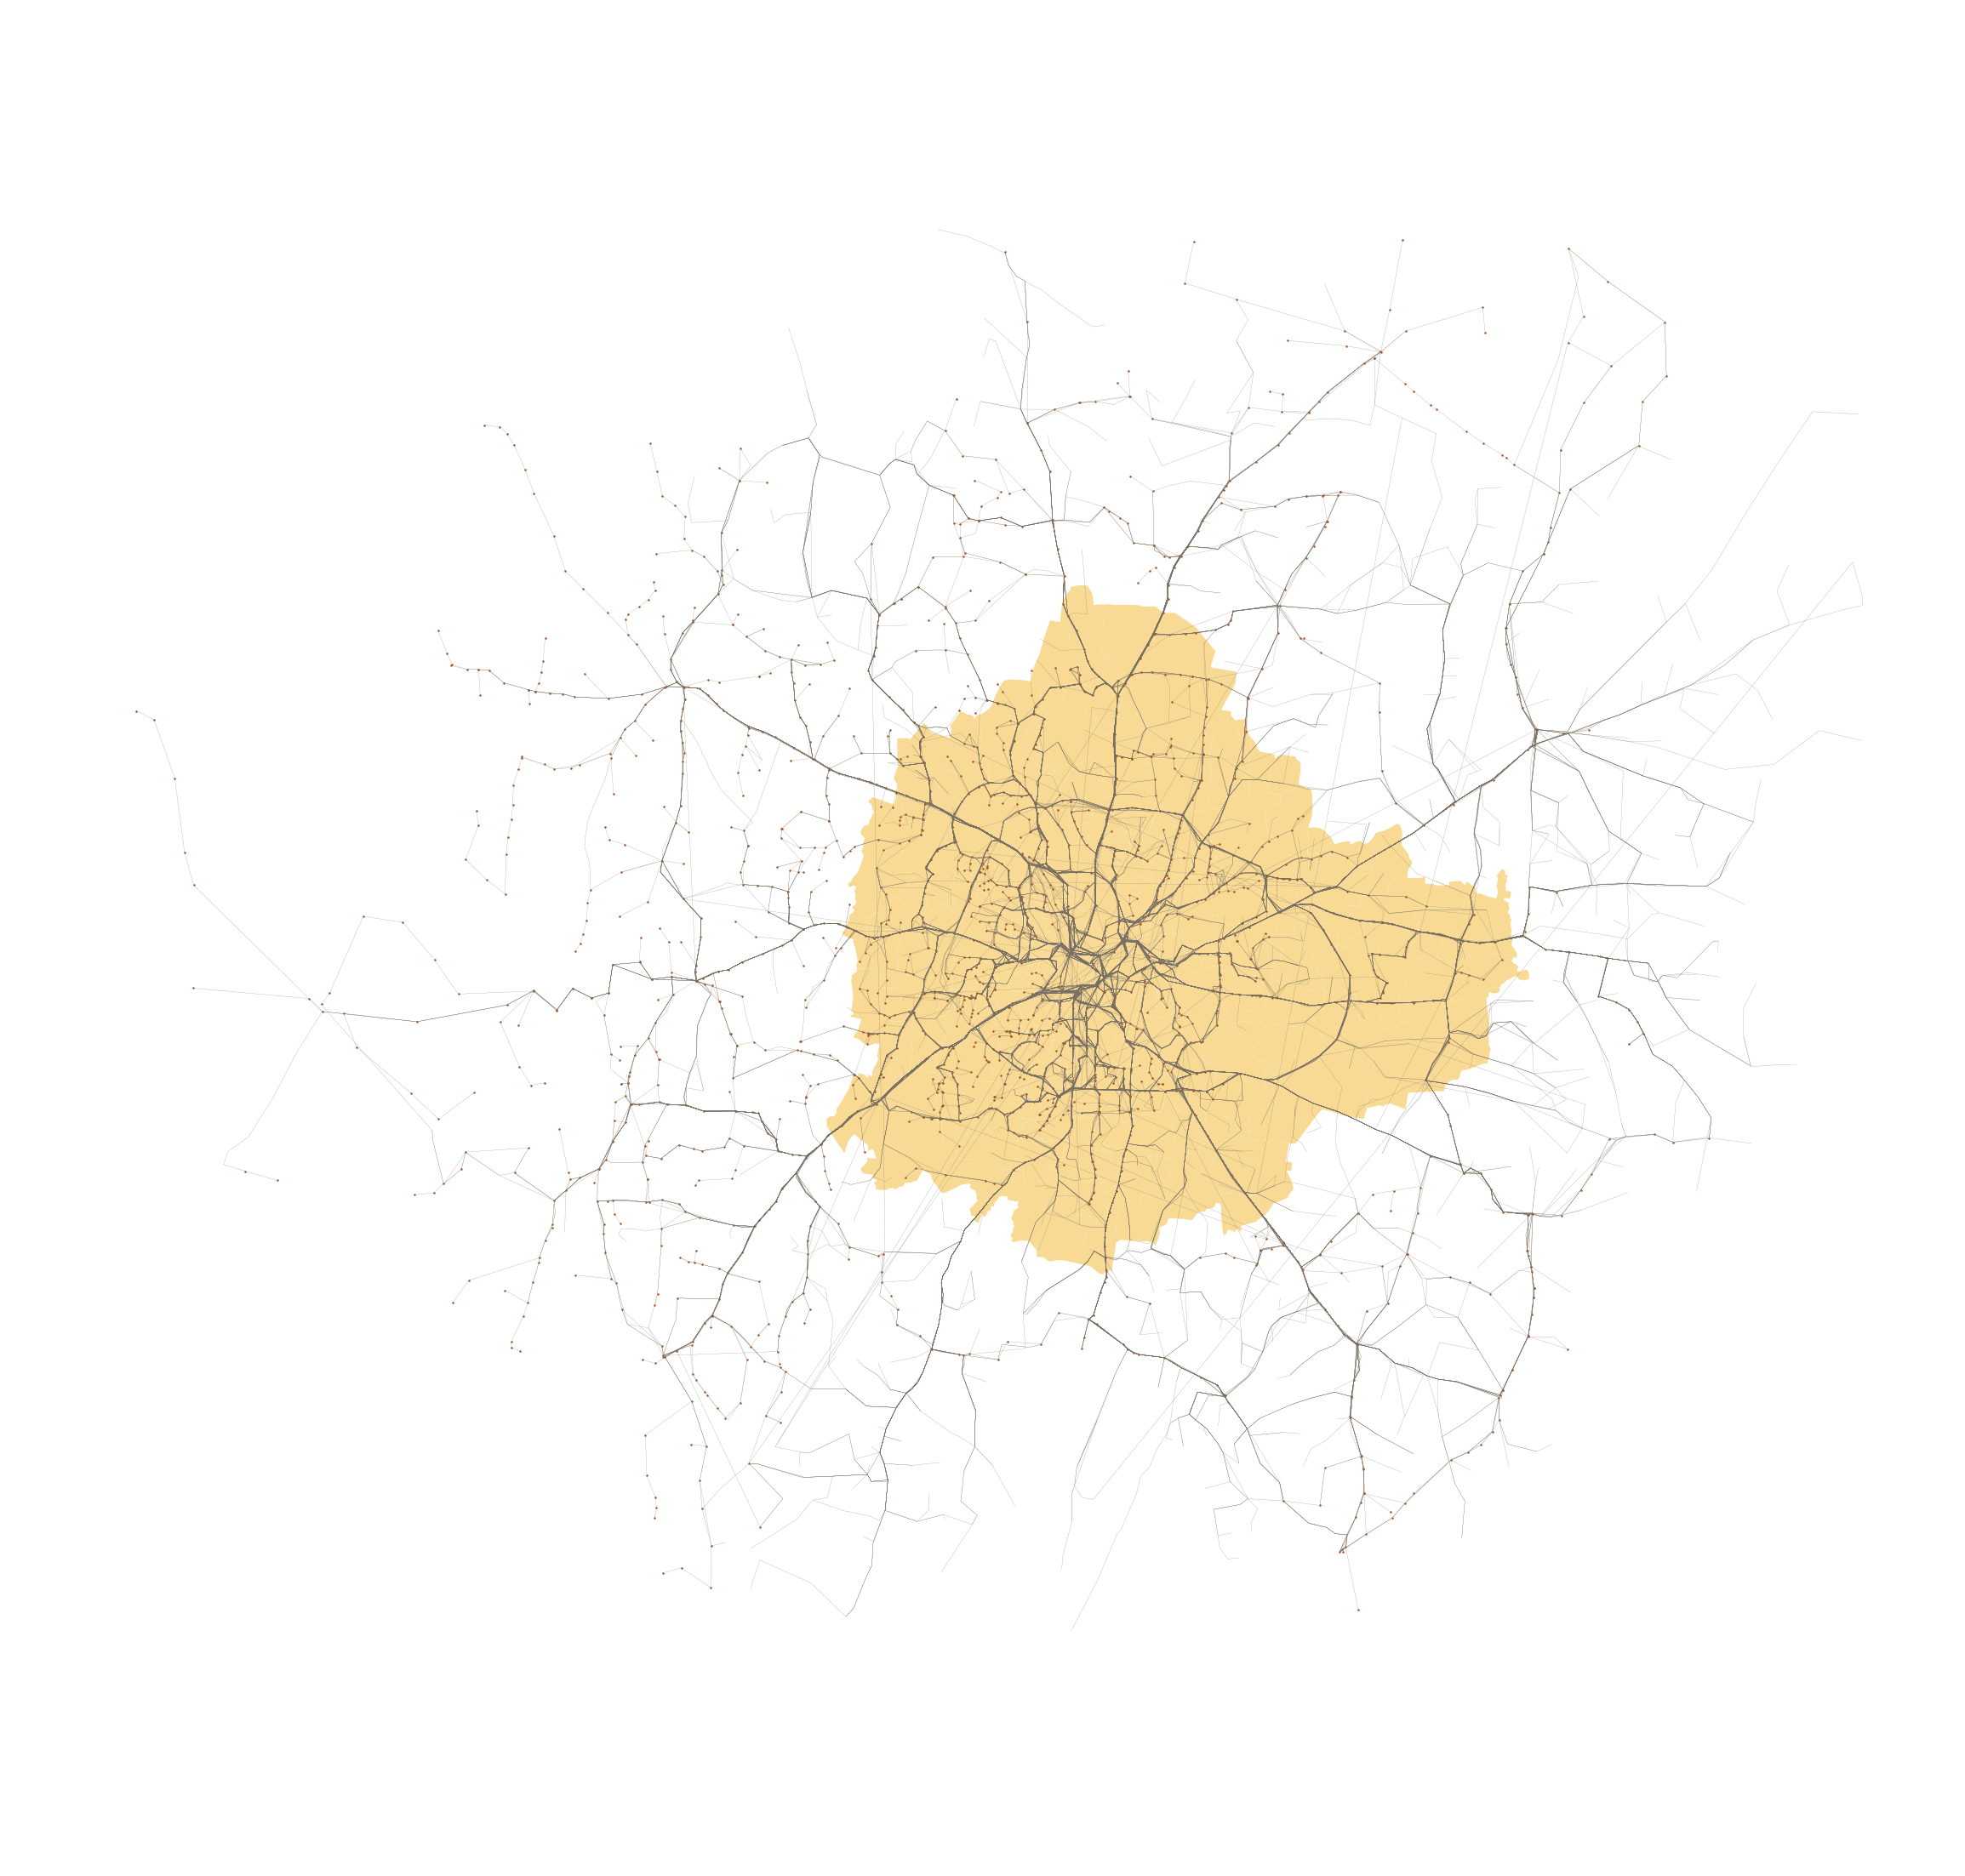

In [70]:
f,ax = plt.subplots(1, figsize=(40,40))
wards.plot(ax=ax, facecolor="#F9DA95", edgecolor="#F9DA95", linewidth=0)
routes.plot(ax=ax, color="#787064", linewidth=0.2)
busstops.plot(ax=ax, color="#AE4B16", markersize=2)
ax.set_axis_off()
plt.axis('equal')
plt.show()

In [73]:
import contextily as cx

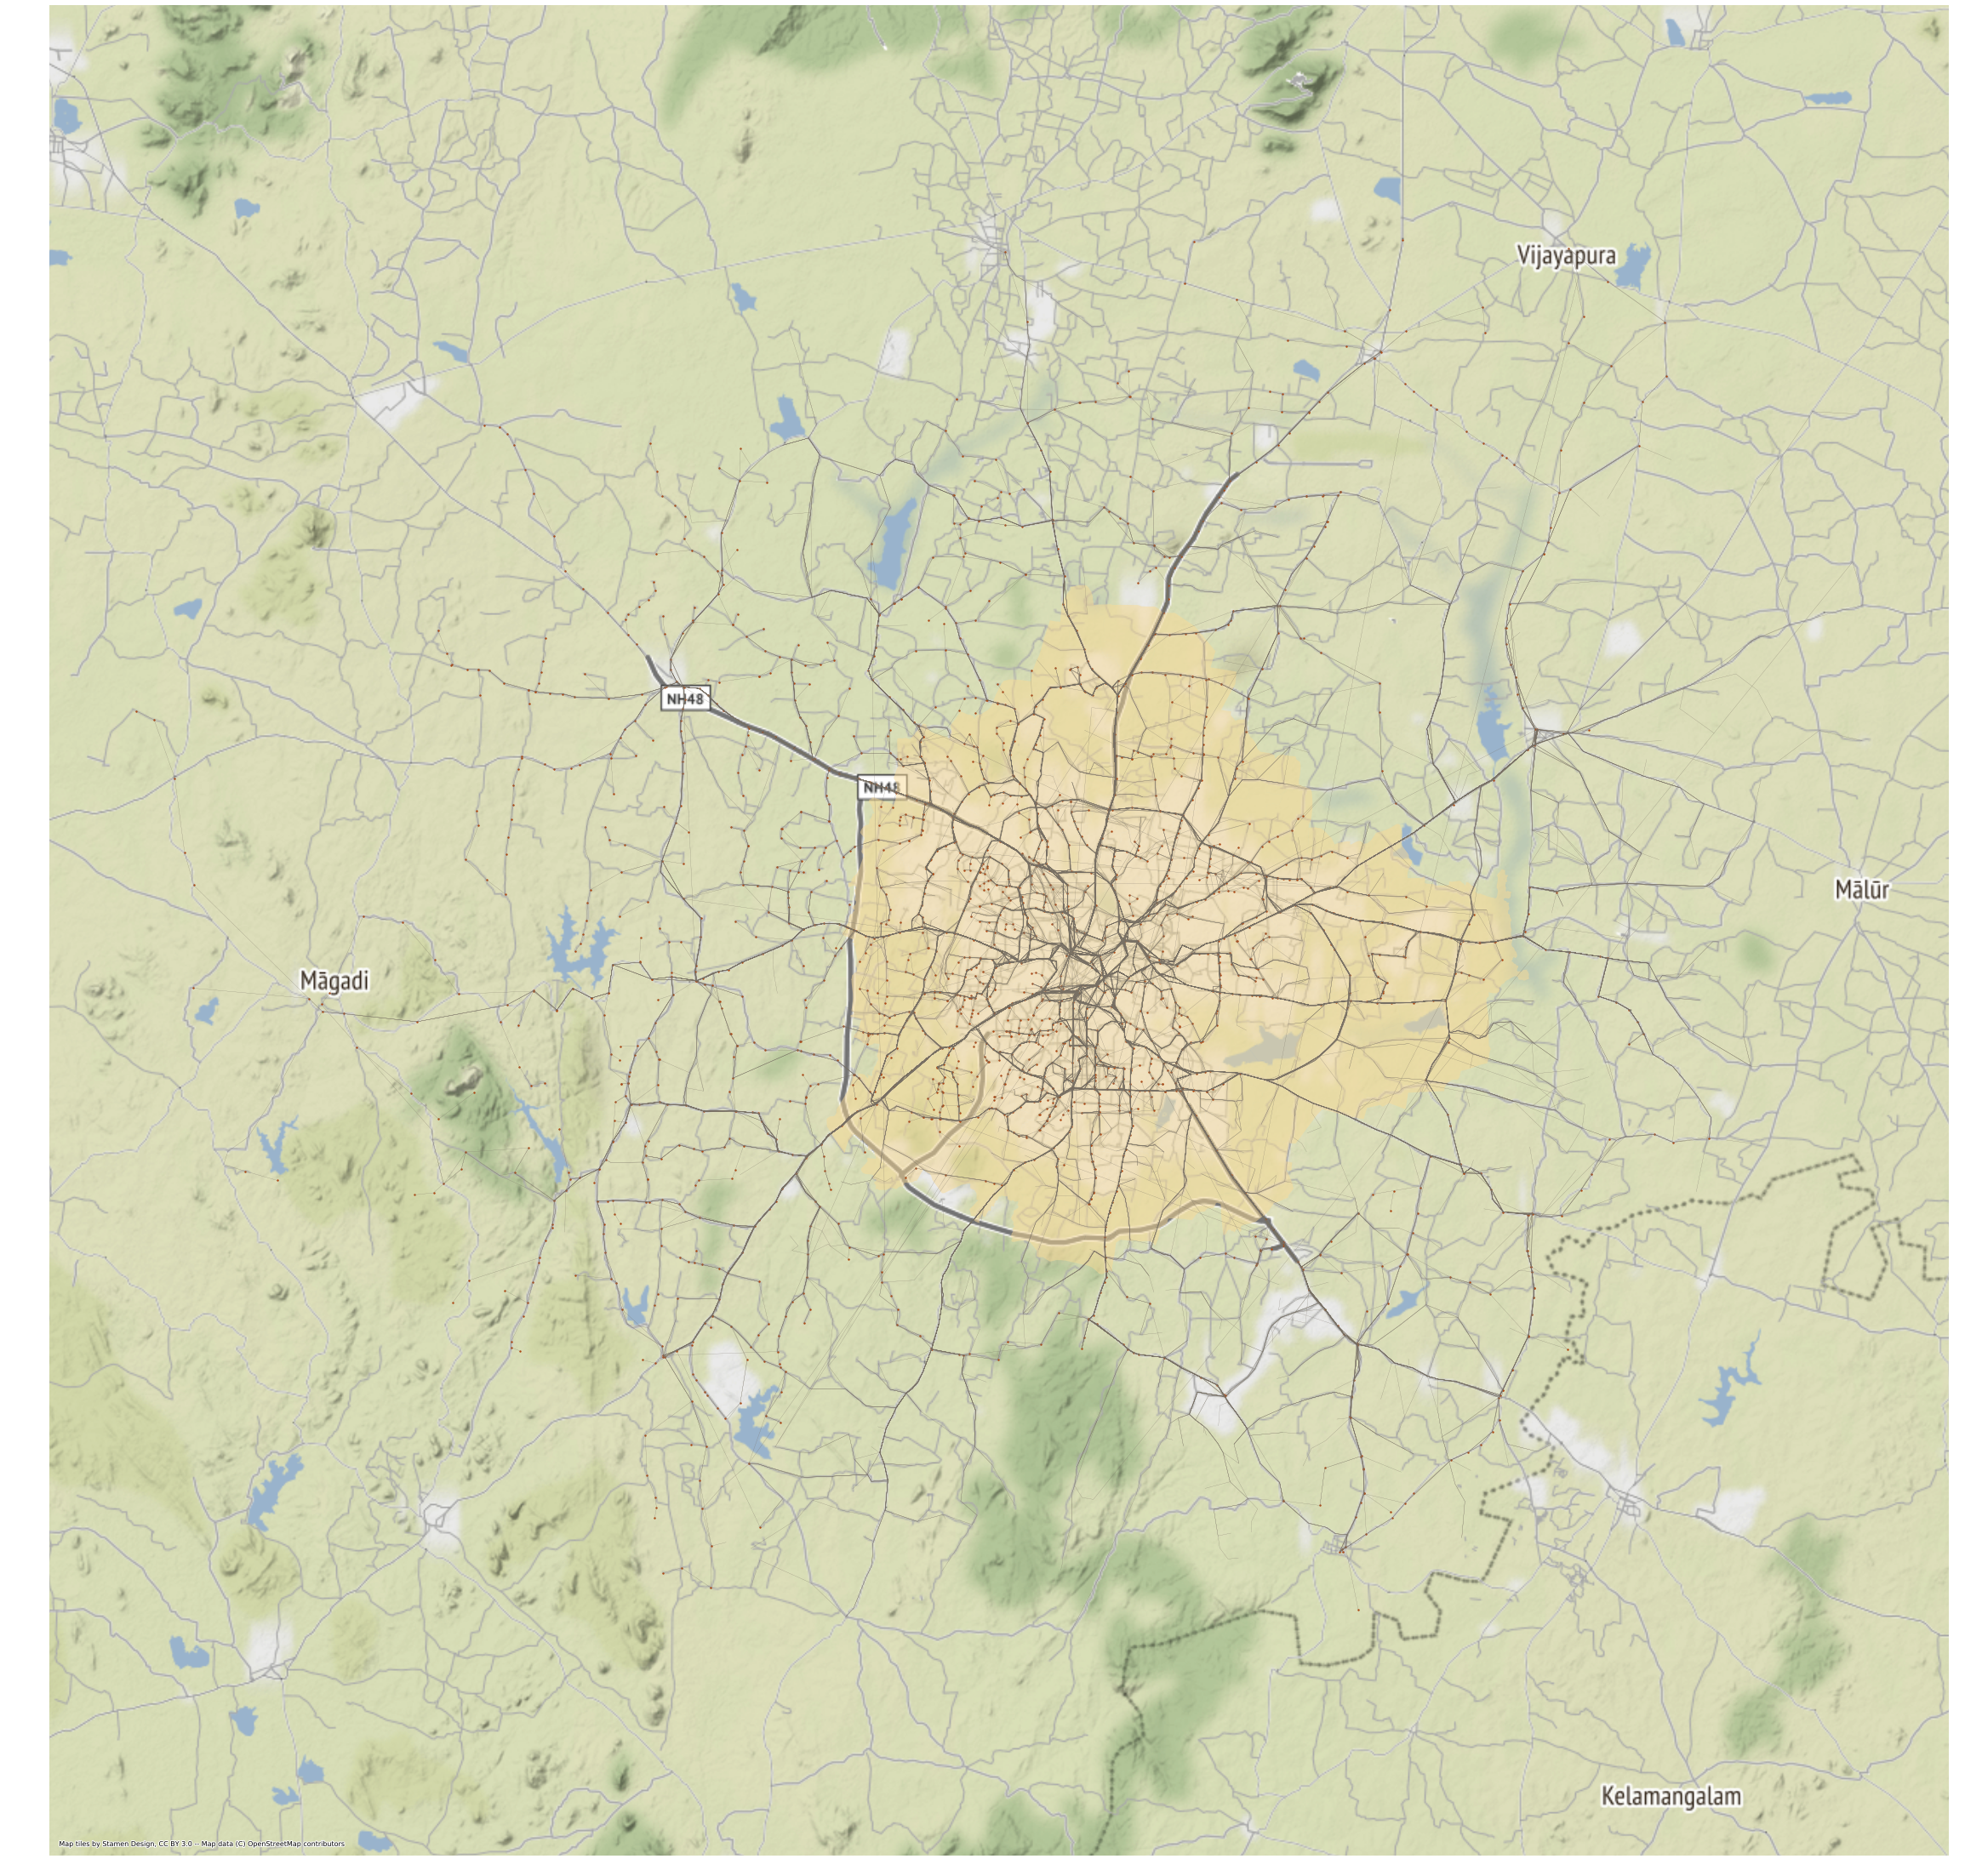

In [75]:
f,ax = plt.subplots(1, figsize=(40,40))
wards.plot(ax=ax, facecolor="#F9DA95", edgecolor="#F9DA95", linewidth=0, alpha=0.5)
routes.plot(ax=ax, color="#787064", linewidth=0.2)
busstops.plot(ax=ax, color="#AE4B16", markersize=2)
ax.set_axis_off()
plt.axis('equal')
cx.add_basemap(ax)
plt.show()

In [92]:
wards.head()

OBJECTID ASS_CONST_  ASS_CONST1  WARD_NO                 WARD_NAME  \
0         1        150   Yelahanka      2.0          Chowdeswari Ward   
1         2        150   Yelahanka      3.0                    Atturu   
2         3        150   Yelahanka      4.0  Yelahanka Satellite Town   
3         4        151  K.R. Puram     51.0               Vijnanapura   
4         5        151  K.R. Puram     53.0              Basavanapura   

     POP_M    POP_F  POP_SC  POP_ST  POP_TOTAL  AREA_SQ_KM        LAT  \
0  10402.0   9224.0  2630.0   286.0    19626.0        7.06  13.121709   
1  13129.0  10891.0  2921.0   665.0    24020.0       10.15  13.102805   
2  13457.0  12325.0  3687.0   601.0    25782.0        4.90  13.090987   
3  18118.0  16969.0  6454.0   228.0    35087.0        2.05  13.006063   
4  11494.0  10518.0  4115.0   325.0    22012.0        6.28  13.016847   

         LON             RESERVATIO  \
0  77.580422                General   
1  77.560038        General (Women)   
2  77.583925  Backward Category - A   
3  77.669565        Scheduled Caste   
4  77.715456                General   

                                            geometry F_maj  
0  POLYGON ((8637534.643 1470838.889, 8637384.452...  Male  
1  POLYGON ((8634899.308 1474251.106, 8635123.821...  Male  
2  POLYGON ((8637384.452 1470978.974, 8637534.643...  Male  
3  POLYGON ((8646944.879 1461042.353, 8646959.032...  Male  
4  POLYGON ((8652751.925 1462086.504, 8652856.813...  Male

In [79]:
wards['F_maj'] = wards.POP_M < wards.POP_F

In [83]:
wards.loc[wards['F_maj']==True, 'F_maj'] = 'Female'
wards.loc[wards['F_maj']==False, 'F_maj'] = 'Male'

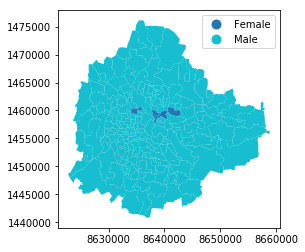

In [86]:
wards.plot(column='F_maj', categorical=True, legend=True, linewidth=0.5)

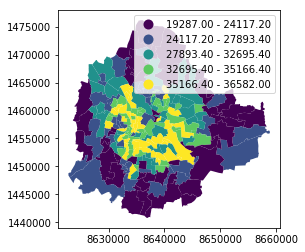

In [97]:
wards.plot(column='POP_TOTAL', scheme='quantiles', legend=True)